# Imports

In [23]:
import yfinance        as yf
import seaborn         as sns
import numpy           as np
import pandas          as pd
import statsmodels.api as sm


from matplotlib              import pyplot as plt
from pandas_datareader       import data   as pdr
from IPython.core.display    import HTML

## Helper Functions

In [24]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## Loading data

In [3]:
start = '2000-01-01'
end = '2019-12-31'

data = pdr.get_data_yahoo( '^GSPC', start=start, end=end )

In [4]:
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971


In [19]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-24,3226.429932,3220.510010,3225.449951,3223.379883,1296540000,3223.379883
2019-12-26,3240.080078,3227.199951,3227.199951,3239.909912,2160680000,3239.909912
2019-12-27,3247.929932,3234.370117,3247.229980,3240.020020,2428670000,3240.020020
2019-12-30,3240.919922,3216.570068,3240.090088,3221.290039,3013290000,3221.290039
2019-12-31,3231.719971,3212.030029,3215.179932,3230.780029,2893810000,3230.780029


# Data Description

In [5]:
df2 = data.copy()

In [6]:
df2.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

# Times Series Visualization

In [7]:
df3 = df2.copy()

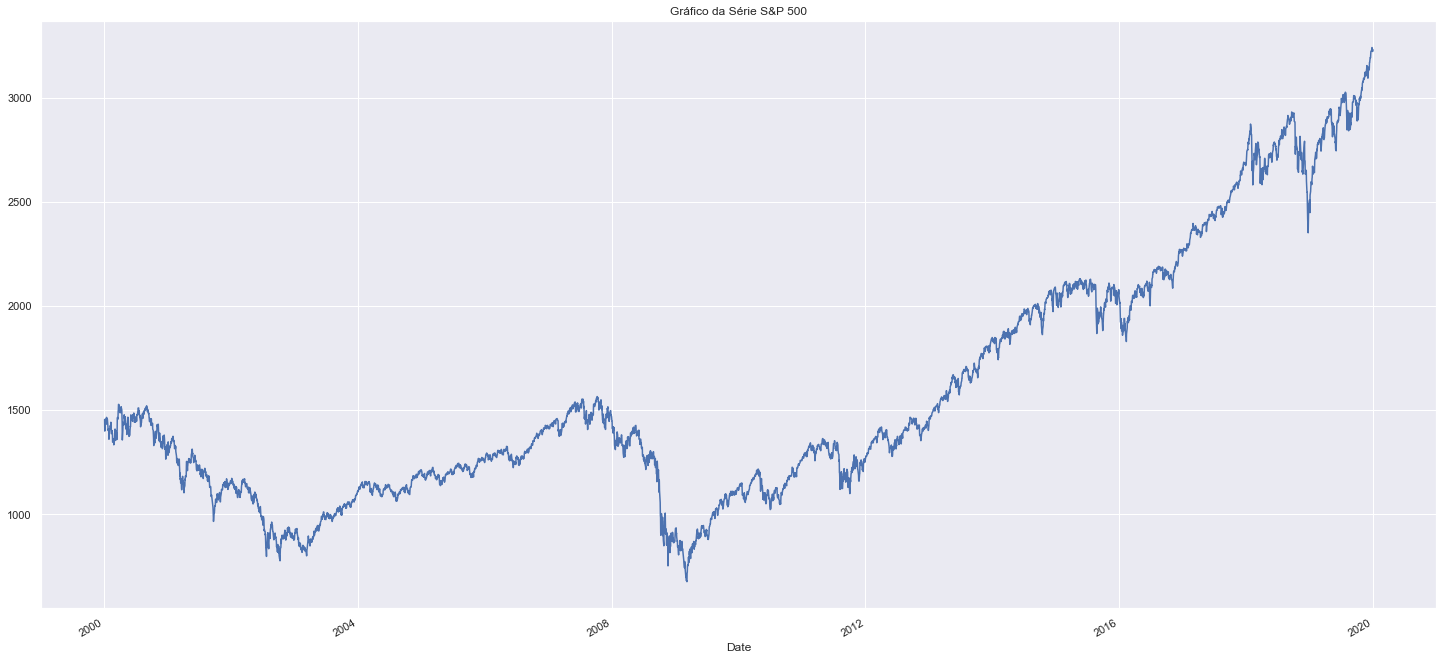

In [8]:
df3['Adj Close'].plot()
plt.title( 'Gráfico da Série S&P 500' );

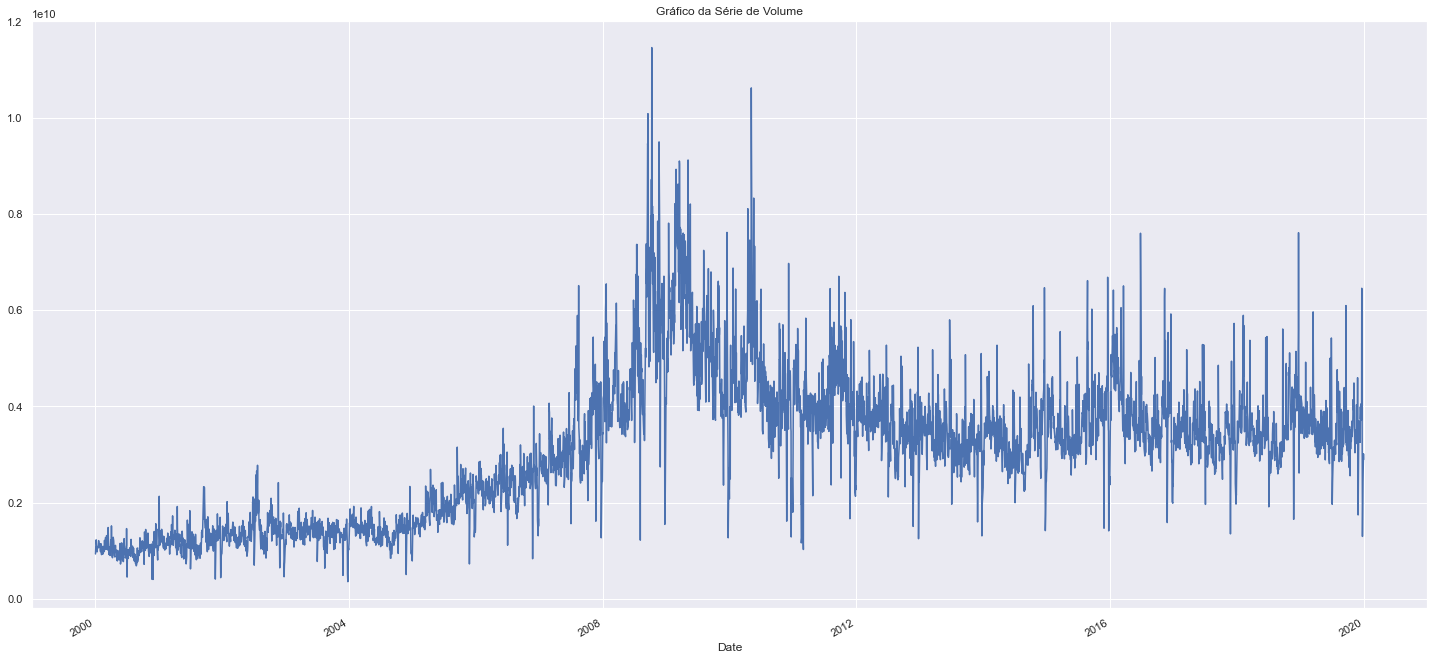

In [9]:
df3['Volume'].plot();
plt.title( 'Gráfico da Série de Volume' );

# Exploratory Data Analysis

In [10]:
df4 = df3.copy()

In [11]:
df4.describe()

,High,Low,Open,Close,Volume,Adj Close
count,5031.000000,5031.000000,5031.000000,5031.000000,5.031000e+03,5031.000000
mean,1583.705860,1565.203475,1574.823903,1575.009290,3.091677e+09,1575.009290
std,586.565207,584.963805,585.834835,585.938690,1.473925e+09,585.938690
min,695.270020,666.789978,679.280029,676.530029,3.560700e+08,676.530029
25%,1159.934998,1142.179993,1151.739990,1151.629944,1.672600e+09,1151.629944
50%,1368.920044,1349.989990,1360.829956,1361.219971,3.218700e+09,1361.219971
75%,1993.084961,1975.660034,1985.319946,1986.479980,3.918595e+09,1986.479980
max,3247.929932,3234.370117,3247.229980,3240.020020,1.145623e+10,3240.020020


In [37]:
# lag de X periodos

periodos = 1

# lag positivo de X periodos
df4['Lag_P1'] = df4['Close'].shift( periodos )

In [38]:
df4.head()

,High,Low,Open,Close,Volume,Adj Close,Lag_P1,High_Low,Retorno
Date,,,,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971,NaN,0,NaN
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044,1455.219971,0,-0.038345
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985,1399.420044,1,0.001922
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951,1402.109985,1,0.000956
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971,1403.449951,1,0.027090


In [39]:
# Dummy para saber se o dia atual é Alta(1) ou Baixa(0)

df4['High_Low'] = np.where( df4['Close'] > df4['Lag_P1'], 1, 0 )

In [40]:
df4.head()

,High,Low,Open,Close,Volume,Adj Close,Lag_P1,High_Low,Retorno
Date,,,,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971,NaN,0,NaN
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044,1455.219971,0,-0.038345
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985,1399.420044,1,0.001922
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951,1402.109985,1,0.000956
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971,1403.449951,1,0.027090


In [41]:
df4['High_Low'].mean()

0.5352812562114888

In [17]:
# Calculando o Retorno

df4['Retorno'] = df4['Close'].pct_change( periodos )

In [18]:
df4.head()

,High,Low,Open,Close,Volume,Adj Close,Lag_P1,High_Low,Retorno
Date,,,,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971,NaN,0,NaN
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044,1455.219971,0,-0.038345
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985,1399.420044,1,0.001922
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951,1402.109985,1,0.000956
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971,1403.449951,1,0.027090


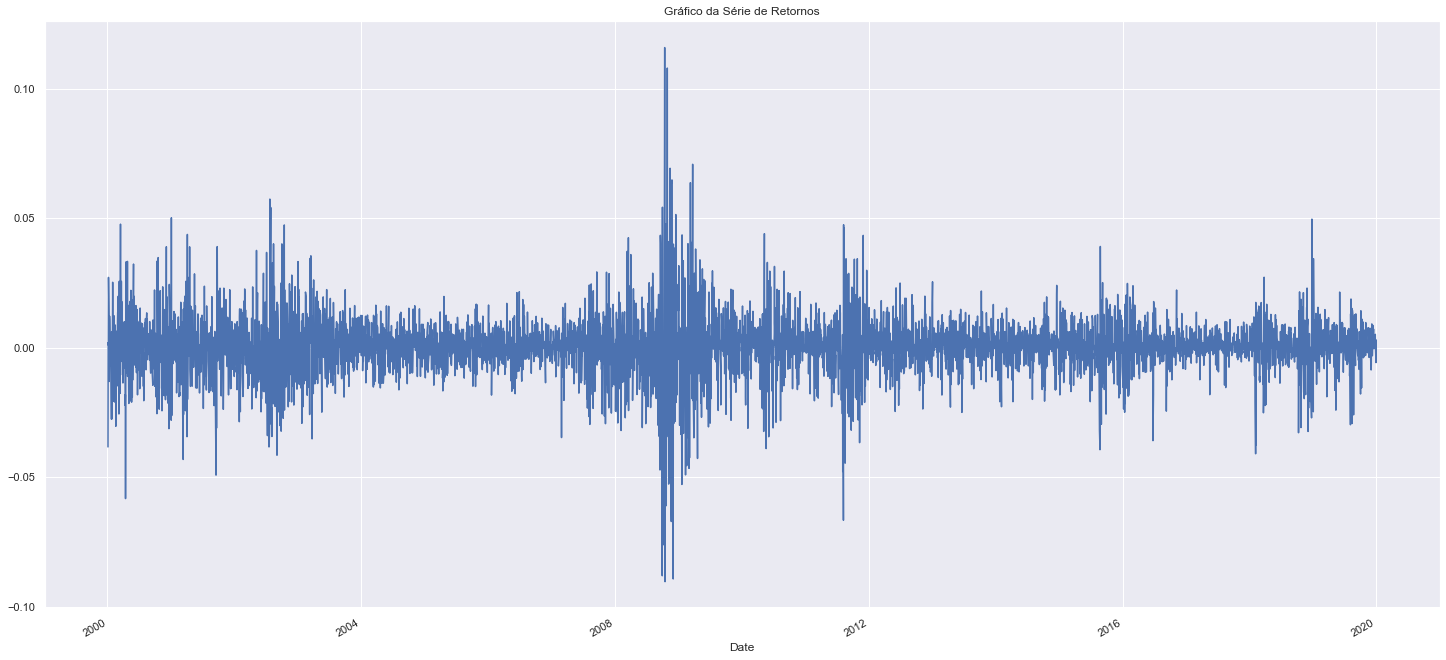

In [19]:
df4['Retorno'].plot()
plt.title( 'Gráfico da Série de Retornos' );

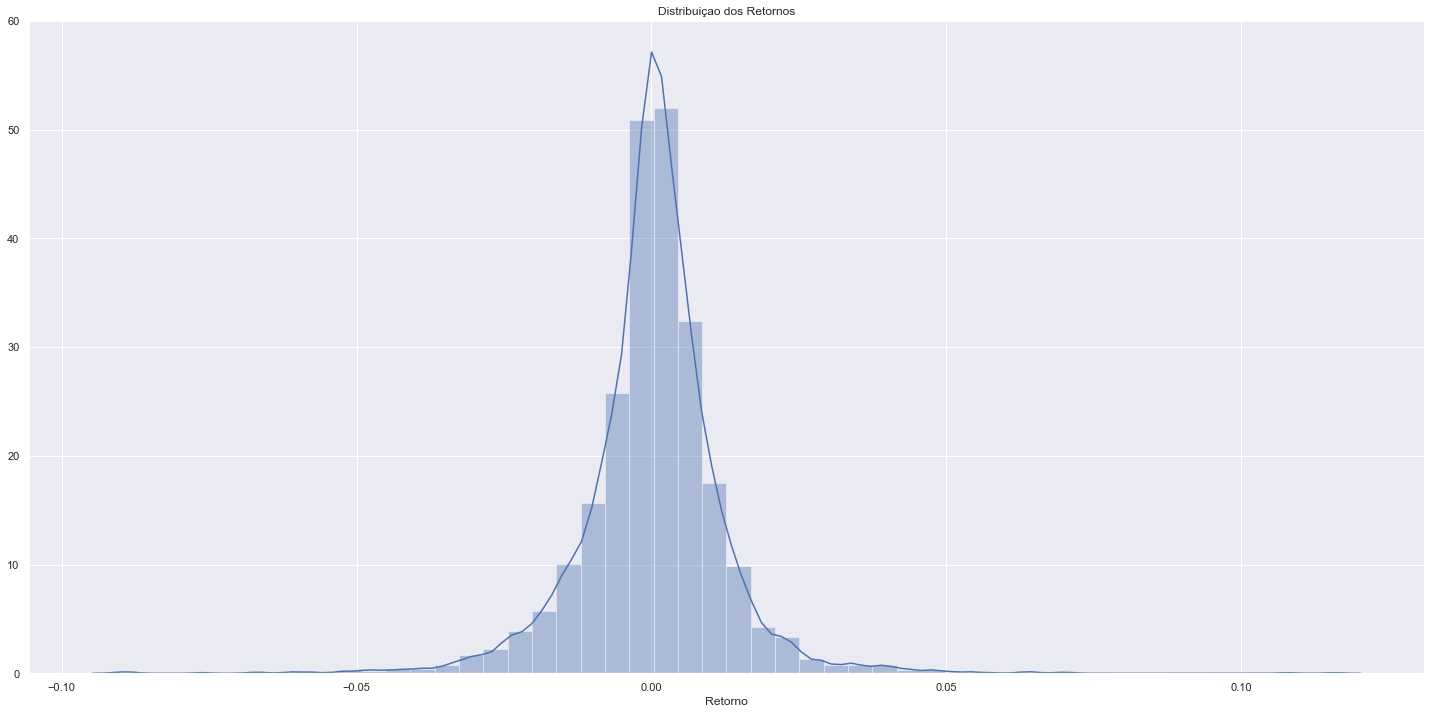

In [20]:
sns.distplot( df4['Retorno'], 
              bins = 50,
              kde=True
            )
plt.title( 'Distribuiçao dos Retornos' );

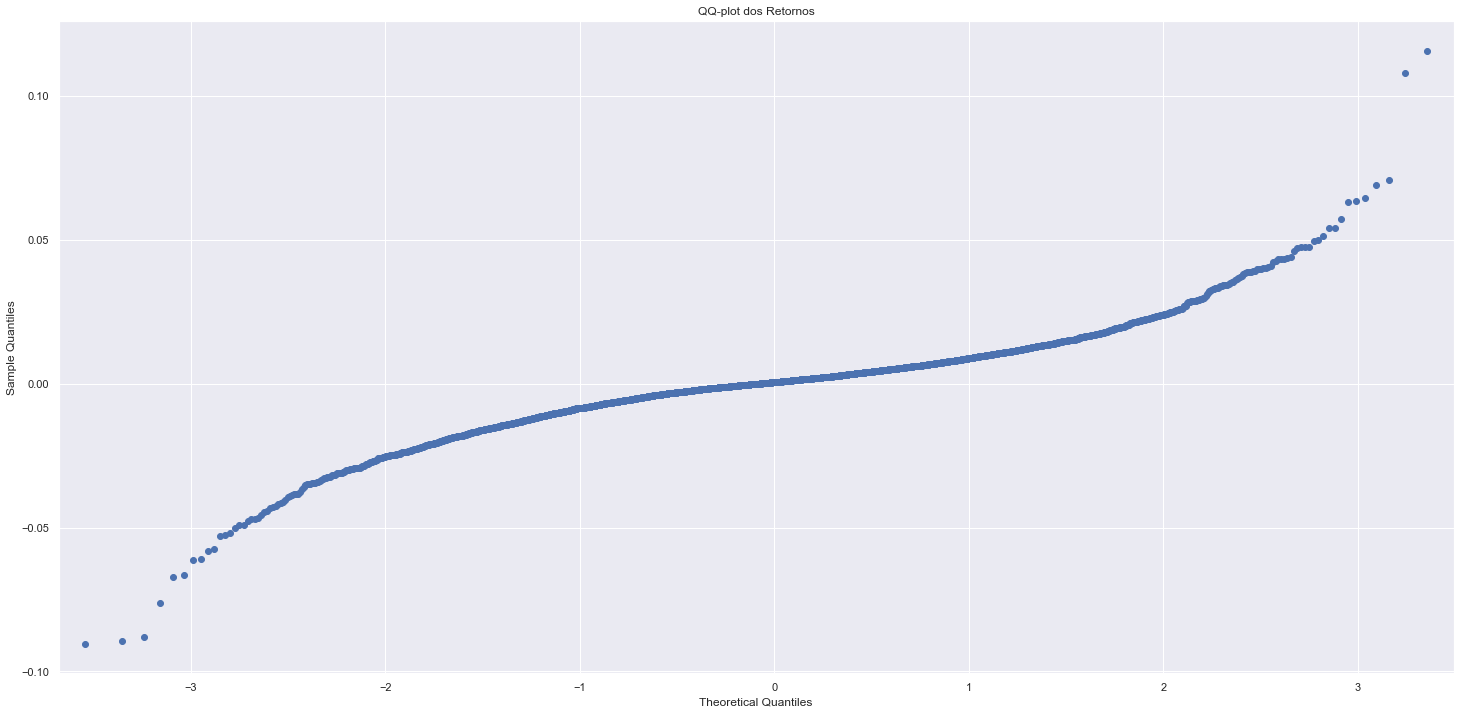

In [21]:
sm.qqplot( df4['Retorno'] )
plt.title( 'QQ-plot dos Retornos' );

Consolidando os gráficos da série histórica, série de retornos, distribuição dos retornos e qq-plot em uma mesma imagem.

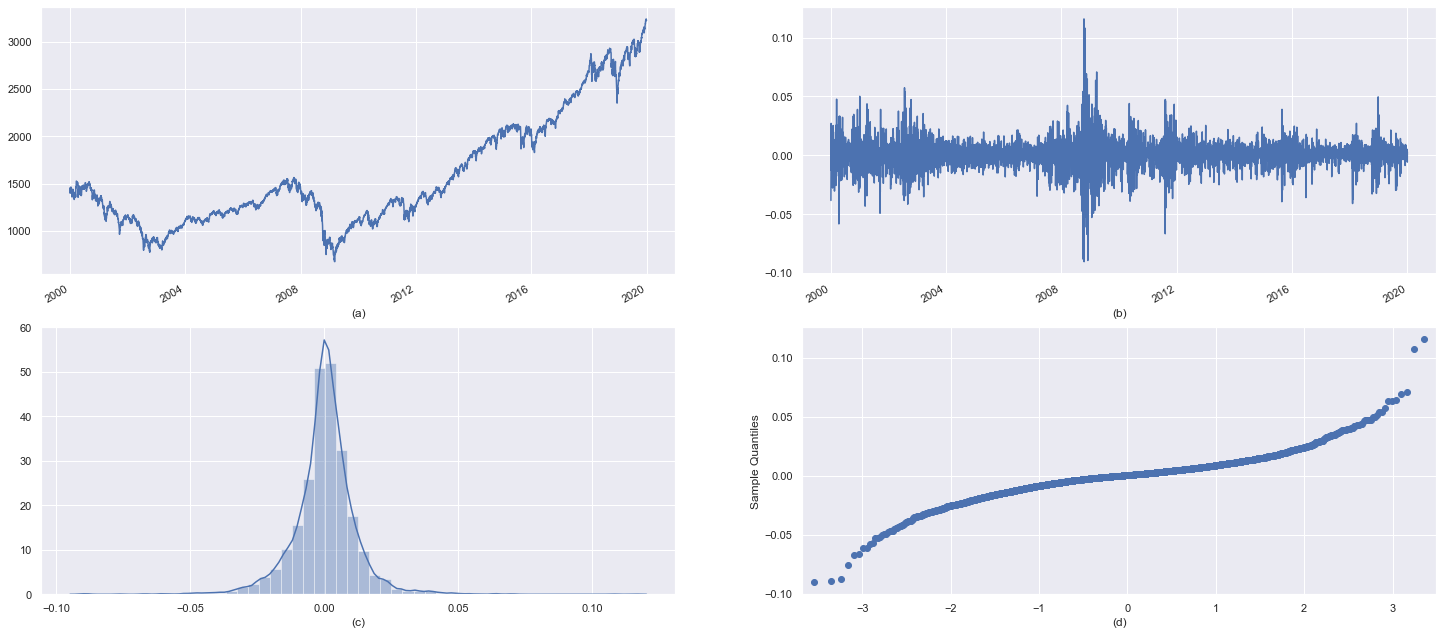

In [35]:
plt.subplot( 2, 2, 1 )
df3['Adj Close'].plot()
plt.xlabel( '(a)' );

plt.subplot( 2, 2, 2 )
df4['Retorno'].plot()
plt.xlabel( '(b)' );

plt.subplot( 2, 2, 3 )
sns.distplot( df4['Retorno'], 
              bins = 50,
              kde=True
            )
plt.xlabel( '(c)' );

#plt.subplot( 2, 2, 4 )
sm.qqplot( df4['Retorno'], ax=plt.subplot( 2, 2, 4 ) ) 
plt.xlabel( '(d)' );

In [49]:
df4['Retorno'].describe()

count    5030.000000
mean        0.000229
std         0.011889
min        -0.090350
25%        -0.004700
50%         0.000547
75%         0.005678
max         0.115800
Name: Retorno, dtype: float64

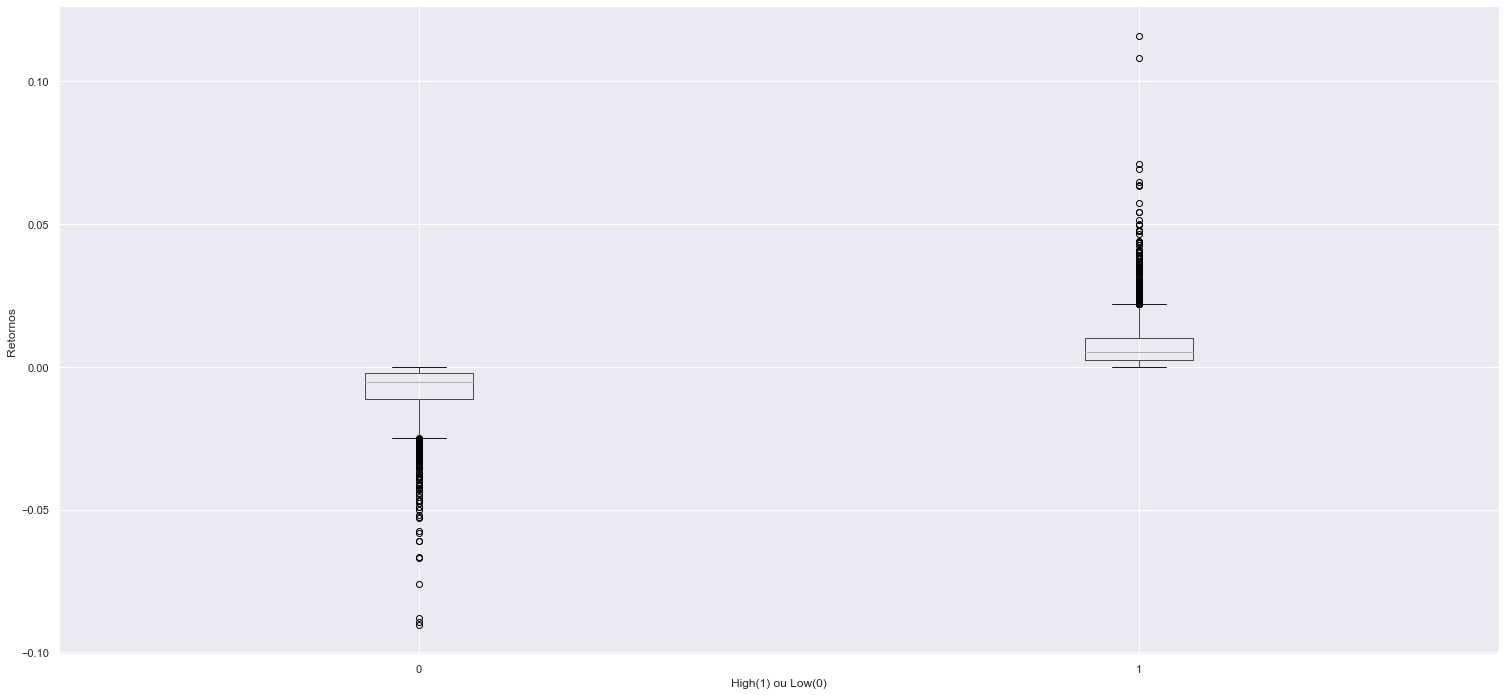

In [54]:
df4.boxplot( by='High_Low', column=['Retorno'], grid = True ) 
title = 'Boxplot dos Retornos por High ou Low'
plt.title( '' )
plt.suptitle( '' ) # para eliminar o titulo padrao do boxplot do pandas
plt.ylabel( 'Retornos' )
plt.xlabel( 'High(1) ou Low(0)' )
plt.show();

# Neural Networks

## Import training dataset

In [173]:
start = '2000-01-01'
end = '2015-12-31'

df5 = pdr.get_data_yahoo( '^GSPC', start=start, end=end )

In [174]:
df5.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971


In [175]:
training_set = df5.iloc[:, 2:3].values

In [176]:
training_set

array([[1469.25      ],
       [1455.2199707 ],
       [1399.42004395],
       ...,
       [2060.54003906],
       [2077.34008789],
       [2060.59008789]])

## Feature Scaling

In [177]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler( feature_range = (0, 1) )
training_set_scaled = sc.fit_transform( training_set )

In [178]:
training_set_scaled

array([[0.54440136],
       [0.53473268],
       [0.49627862],
       ...,
       [0.95188407],
       [0.96346169],
       [0.95191856]])

## Creating a data structure with 60 timesteps and 1 output

In [180]:
training_set_scaled.shape

(4025, 1)

In [183]:
X_train = []
y_train = []

for i in range( 60, 4025 ):
    X_train.append( training_set_scaled[i-60:i, 0] )
    y_train.append( training_set_scaled[i, 0] )
X_train, y_train = np.array( X_train ), np.array( y_train )

In [184]:
X_train

array([[0.54440136, 0.53473268, 0.49627862, ..., 0.58444049, 0.58451628,
        0.58203539],
       [0.53473268, 0.49627862, 0.49813237, ..., 0.58451628, 0.58203539,
        0.57091953],
       [0.49627862, 0.49813237, 0.49905579, ..., 0.58203539, 0.57091953,
        0.57146398],
       ...,
       [0.85625184, 0.87869026, 0.90094957, ..., 0.93924515, 0.9539377 ,
        0.94997513],
       [0.87869026, 0.90094957, 0.89799313, ..., 0.9539377 , 0.94997513,
        0.95188407],
       [0.90094957, 0.89799313, 0.90603544, ..., 0.94997513, 0.95188407,
        0.96346169]])

In [185]:
y_train

array([0.57091953, 0.57146398, 0.55726767, ..., 0.95188407, 0.96346169,
       0.95191856])

## Reshaping

In [186]:
X_train = np.reshape( X_train, (X_train.shape[0], X_train.shape[1], 1 ) )

In [187]:
X_train

array([[[0.54440136],
        [0.53473268],
        [0.49627862],
        ...,
        [0.58444049],
        [0.58451628],
        [0.58203539]],

       [[0.53473268],
        [0.49627862],
        [0.49813237],
        ...,
        [0.58451628],
        [0.58203539],
        [0.57091953]],

       [[0.49627862],
        [0.49813237],
        [0.49905579],
        ...,
        [0.58203539],
        [0.57091953],
        [0.57146398]],

       ...,

       [[0.85625184],
        [0.87869026],
        [0.90094957],
        ...,
        [0.93924515],
        [0.9539377 ],
        [0.94997513]],

       [[0.87869026],
        [0.90094957],
        [0.89799313],
        ...,
        [0.9539377 ],
        [0.94997513],
        [0.95188407]],

       [[0.90094957],
        [0.89799313],
        [0.90603544],
        ...,
        [0.94997513],
        [0.95188407],
        [0.96346169]]])

## Import keras library

In [188]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

## Initialising the RNN

In [189]:
regressor = Sequential()

## Adding the first layer and dropout regularisation

In [190]:
regressor.add( LSTM( units = 50, return_sequences = True, input_shape = ( X_train.shape[1], 1 ) ) )
regressor.add( Dropout( 0.2 ) )

## Adding a second layer and dropout regularisation

In [191]:
regressor.add( LSTM( units = 50, return_sequences = True ) )
regressor.add( Dropout( 0.2 ) )

## Adding a third layer and dropout regularisation

In [192]:
regressor.add( LSTM( units = 50, return_sequences = True ) )
regressor.add( Dropout( 0.2 ) )

## Adding a fourth layer and dropout regularisation

In [193]:
regressor.add( LSTM( units = 50 ) )
regressor.add( Dropout( 0.2 ) )

## Adding the output layer and dropout regularisation

In [194]:
regressor.add( Dense( units = 1 ) )

## Compiling the RNN

In [195]:
regressor.compile( optimizer = 'adam', loss = 'mean_squared_error' )

## Fitting the RNN

In [196]:
regressor.fit( X_train, y_train, epochs = 100, batch_size = 32 )

Epoch 1/100
124/124 [==============================] - 9s 72ms/step - loss: 0.0106
Epoch 2/100
124/124 [==============================] - 9s 74ms/step - loss: 0.0032
Epoch 3/100
124/124 [==============================] - 8s 68ms/step - loss: 0.0029
Epoch 4/100
124/124 [==============================] - 10s 79ms/step - loss: 0.0030
Epoch 5/100
124/124 [==============================] - 9s 74ms/step - loss: 0.0024
Epoch 6/100
124/124 [==============================] - 9s 75ms/step - loss: 0.0021
Epoch 7/100
124/124 [==============================] - 9s 73ms/step - loss: 0.0023
Epoch 8/100
124/124 [==============================] - 9s 72ms/step - loss: 0.0020
Epoch 9/100
124/124 [==============================] - 9s 74ms/step - loss: 0.0020
Epoch 10/100
124/124 [==============================] - 9s 72ms/step - loss: 0.0018
Epoch 11/100
124/124 [==============================] - 9s 74ms/step - loss: 0.0018
Epoch 12/100
124/124 [==============================] - 9s 73ms/step - loss: 0.0016


## Making the predictions

### Import test dataset

In [197]:
start = '2016-01-01'
end = '2019-12-31'

df6 = pdr.get_data_yahoo( '^GSPC', start=start, end=end )

In [198]:
real_stock_price = df6.iloc[:, 2:3].values

### Getting the predicted S&P 500

In [199]:
real_stock_price.shape

(1006, 1)

In [200]:
dataset_total = pd.concat(( df5['Open'], df6['Open']), axis = 0 )
inputs = dataset_total[len( dataset_total ) - len( df6 ) - 60:].values
inputs = inputs.reshape( -1,1 )
inputs = sc.transform( inputs )
X_test = []
for i in range( 60, 1006 ):
    X_test.append( inputs[i-60:i, 0] )
X_test = np.array( X_test )
X_test = np.reshape( X_test, ( X_test.shape[0], X_test.shape[1], 1 ) )
predicted_stock_price = regressor.predict( X_test )
predicted_stock_price = sc.inverse_transform( predicted_stock_price )

### Visualising the results

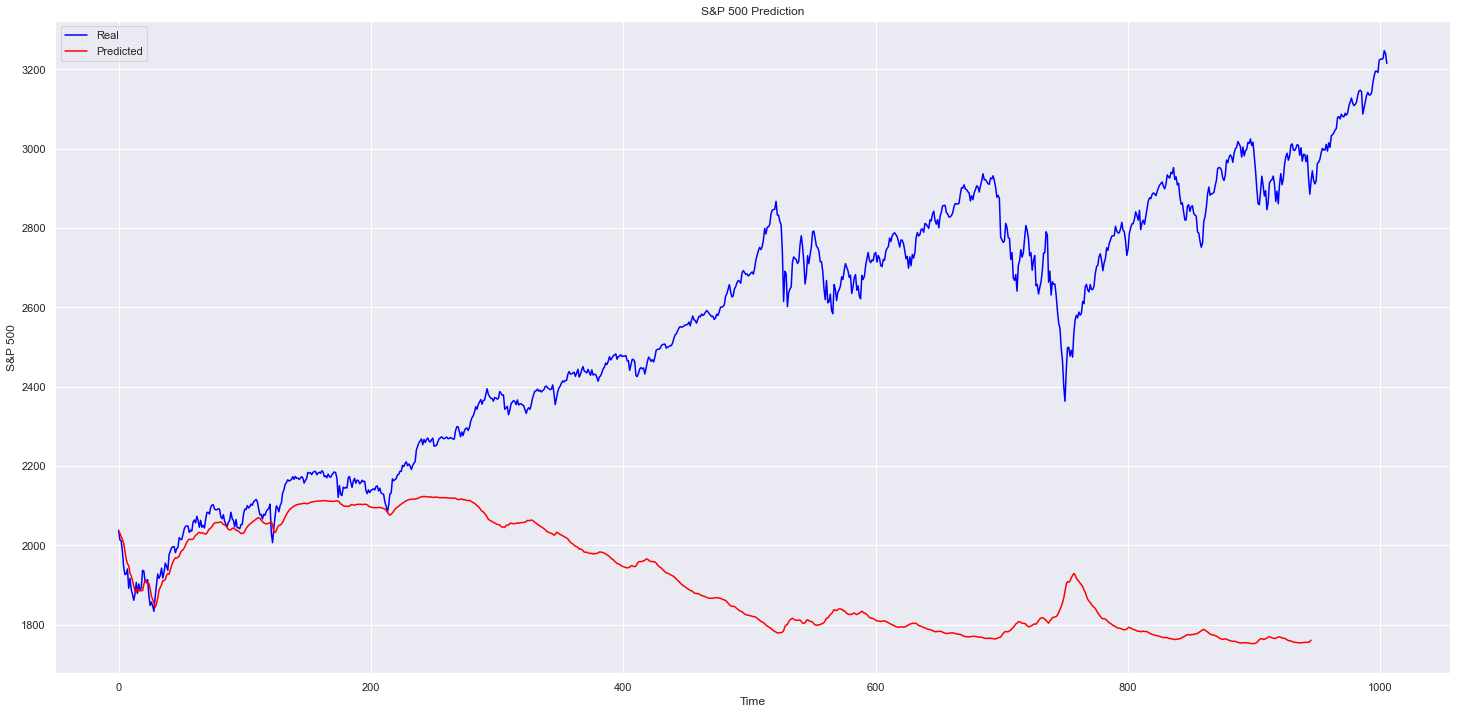

In [202]:
plt.plot( real_stock_price, color = 'blue', label = 'Real' )
plt.plot( predicted_stock_price, color = 'red', label = 'Predicted')
plt.title('S&P 500 Prediction')
plt.xlabel('Time')
plt.ylabel('S&P 500')
plt.legend()
plt.show()